In [30]:
%matplotlib inline
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, Attention, BatchNormalization
from tensorflow.keras import optimizers, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from keras.models import Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
import pprint
from datetime import datetime
import matplotlib
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import r2_score
from tensorflow.keras.regularizers import l2
from joblib import dump, load
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

# import sklearn
import math
from numpy.random import seed

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scikeras.wrappers import KerasRegressor



seed_value = 10
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
print('pd.__version__: ',pd.__version__)
print('np.__version__: ',np.__version__)
print('keras.__version__: ',keras.__version__)
print('tf.__version__: ',tf.__version__)
print('matplotlib.__version__: ',matplotlib.__version__)

pd.__version__:  2.2.3
np.__version__:  1.26.4
keras.__version__:  3.6.0
tf.__version__:  2.17.0
matplotlib.__version__:  3.9.2


In [31]:
import os

# Define the directory you want to list
directory = 'C:/Backup - Oct 2024/Oct-2023 Backup/Users/msalmaniaran/PhD/Results-data/Reconfigurable-patch'

# List all files and directories in the specified directory
all_files = os.listdir(directory)

# Filter out only the files
files = [f for f in all_files if os.path.isfile(os.path.join(directory, f))]

# Print the list of files
for file in files:
    print(file)

dict_files = {i: files[i] for i in range(len(files))}
print(dict_files)

AllDiode-OFF-Alpha sweep.csv
AllDiode-OFF-fx sweep.csv
AllDiode-OFF-fy sweep.csv
AllDiode-OFF-l sweep.csv
AllDiode-OFF-lextention sweep.csv
AllDiode-OFF-lh sweep.csv
AllDiode-OFF-lr sweep.csv
AllDiode-OFF-lv sweep.csv
AllDiode-OFF-offset1 sweep.csv
AllDiode-OFF-pr sweep.csv
AllDiode-OFF-pr2 sweep.csv
AllDiode-OFF-w sweep.csv
AllDiode-OFF-wr sweep.csv
AllDiode-OFF-wu sweep.csv
AllDiode-ON-Alpha sweep.csv
AllDiode-ON-fx sweep.csv
AllDiode-ON-fy sweep.csv
AllDiode-ON-l sweep.csv
AllDiode-ON-lextention sweep.csv
AllDiode-ON-lh sweep.csv
AllDiode-ON-lr sweep.csv
AllDiode-ON-lv sweep.csv
AllDiode-ON-offset1 sweep.csv
AllDiode-ON-pr sweep.csv
AllDiode-ON-pr2 sweep.csv
AllDiode-ON-w sweep.csv
AllDiode-ON-wr sweep.csv
AllDiode-ON-wu sweep.csv
lowerDiode-ON-Alpha sweep.csv
lowerDiode-ON-fx sweep.csv
lowerDiode-ON-fy sweep.csv
lowerDiode-ON-l sweep.csv
lowerDiode-ON-lextention sweep.csv
lowerDiode-ON-lh sweep.csv
lowerDiode-ON-lr sweep.csv
lowerDiode-ON-lv sweep.csv
lowerDiode-ON-offset1 sweep.cs

In [32]:
num_dfs = 14
n = 1
df = pd.DataFrame()
for i in range(num_dfs*(n-1), n*num_dfs):
    # Creating a sample DataFrame with random data
    df_new = pd.read_csv("C:/Backup - Oct 2024/Oct-2023 Backup/Users/msalmaniaran/PhD/Results-data/Reconfigurable-patch/"+str(dict_files[i])) 
    df = pd.concat([df, df_new], ignore_index=True)

# for i in range(4*num_dfs):
#     # Creating a sample DataFrame with random data
#     df_new = pd.read_csv("D:/Oct-2023 Backup/Users/msalmaniaran/PhD/Results-data/Reconfigurable-patch/"+str(dict_files[i])) 
#     df = pd.concat([df, df_new], ignore_index=True)

# Frequency Window

In [33]:
df_ys = df.drop(['alpha [mm]','fx [mm]', 'fy [mm]', 'l [mm]', 'lextension1 [mm]', 'lh [mm]', 'lr [mm]', 'lv [mm]', 'offset1 [mm]', 'pr [mm]', 'pr2 [mm]', 'w [mm]', 'wr [mm]', 'wu [mm]', 'Diode 1 state', 'Diode 2 state', 'Freq [GHz]'],axis=1)
ys_data = df_ys.values
df_yf = df.drop(['alpha [mm]','fx [mm]', 'fy [mm]', 'l [mm]', 'lextension1 [mm]', 'lh [mm]', 'lr [mm]', 'lv [mm]', 'offset1 [mm]', 'pr [mm]', 'pr2 [mm]', 'w [mm]', 'wr [mm]', 'wu [mm]', 'Diode 1 state', 'Diode 2 state', 'dB(S(1,1)) []'],axis=1)
yf_data = df_yf.values
df_y = df.drop(['alpha [mm]','fx [mm]', 'fy [mm]', 'l [mm]', 'lextension1 [mm]', 'lh [mm]', 'lr [mm]', 'lv [mm]', 'offset1 [mm]', 'pr [mm]', 'pr2 [mm]', 'w [mm]', 'wr [mm]', 'wu [mm]', 'Diode 1 state', 'Diode 2 state'],axis=1)
array = df_ys.values

a = len(df)
b = int(a/250) # 250 is the number of sampling points in a single graph of S11 parameter
reshaped_array = array.reshape(b, 250)   #250 is the number of sample points within 1-4 GHz.
df_yst = pd.DataFrame(reshaped_array)


# crob the frequency as needed
df_yst = df_yst.iloc[:, 40:-80] 
freq = df_yf.iloc[40:170].values
freq = np.squeeze(freq).tolist()


In [34]:
# freq = np.squeeze(yf_data[:len(df_yst.columns)]).tolist()
# freq = freq[40:-40]
# print(freq)

# Reload Surrogate models

In [35]:
Surrogate1 = load_model('ANN_decoder1.keras')
Surrogate2 = load_model('ANN_decoder2.keras')
Surrogate3 = load_model('ANN_decoder3.keras')
Surrogate4 = load_model('ANN_decoder4.keras')

C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL-Oct2024\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL-Oct2024\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [200]:
x1 = np.array([-0.53543137,  0.0548655 ,  0.21073547,  0.06276533, -0.01123407,
        0.06335771,  0.02316934,  0.15493   ,  0.18526412, -0.23269195,
        0.17344425, -0.17463979,  0.12431098,  0.02725491])
x2 = np.array([ 1.15259188,  0.03169584,  0.22498164, -0.04767922, -0.02699029,
        0.16014375,  0.02720018,  0.13337159,  0.24500376, -0.18947647,
        0.18151366, -0.07039868,  0.02787709, -0.02957473])
x3 = np.array([ 0.00044023,  0.06098977,  0.19923226, -0.09232034, -0.06310218,
        0.19543453,  0.02711807,  0.07759908,  0.26911374, -0.22341645,
        0.17709264, -0.00698893,  0.04785898,  0.02822875])
x4 = np.array([ 1.89700401e-01,  7.11254240e-02,  6.21724894e-14, -3.26849658e-13,
       -3.55251967e-02,  1.55942229e-01,  4.45846614e-03,  1.64994670e-01,
        2.57905182e-01, -2.29323307e-01,  1.39949736e-01, -5.30677029e-02,
        6.49566527e-02,  3.63311905e-02])

In [201]:
scaler_y1=load('scaler_y1.bin')
scaler_y2=load('scaler_y2.bin')
scaler_y3=load('scaler_y3.bin')
scaler_y4=load('scaler_y4.bin')

In [202]:
scaler_x1=load('scaler_x1.bin')
scaler_x2=load('scaler_x2.bin')
scaler_x3=load('scaler_x3.bin')
scaler_x4=load('scaler_x4.bin')

In [311]:
x_data1 = np.load('x_data1.npy')

In [312]:
np.shape(x_data1[0])

(14,)

In [313]:
x_data1_trans = scaler_x1.transform(x_data1)

In [314]:
pr1 = Surrogate1.predict(x_data1_trans)
pr2 = Surrogate2.predict(x_data1_trans)
pr3 = Surrogate3.predict(x_data1_trans)
pr4 = Surrogate4.predict(x_data1_trans)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


243


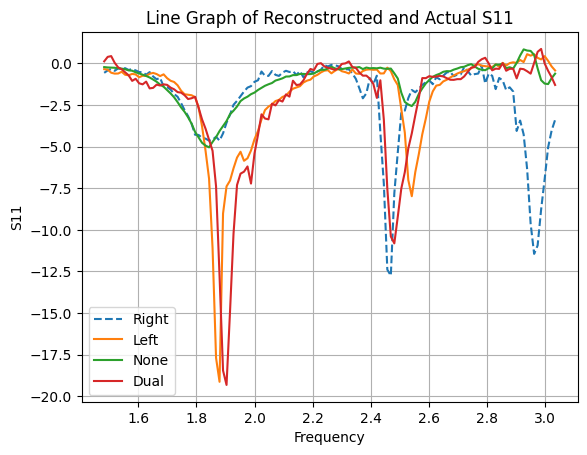

In [336]:
i = random.randint(1,len(pr1))
# i = 200
print(i)
prr1 = scaler_y1.inverse_transform(pr1)
prr2 = scaler_y2.inverse_transform(pr2)
prr3 = scaler_y3.inverse_transform(pr3)
prr4 = scaler_y4.inverse_transform(pr4)
# print(np.shape(prr4[508]))
plt.plot(freq, prr1[i],'--', label = 'Right')
plt.plot(freq, prr2[i], label = 'Left')
plt.plot(freq, prr3[i], label = 'None')
plt.plot(freq, prr4[i], label = 'Dual')
plt.xlabel('Frequency')
plt.ylabel('S11')
plt.title('Line Graph of Reconstructed and Actual S11')
plt.legend()  # Show legend
plt.grid(True)
plt.show()

# Feature extraction

In [350]:
# Function to find resonant frequencies and calculate bandwidth
def process_prr(prr, key):
    peaks, _ = find_peaks(-prr, height=-threshold)  # Peaks of -S11 correspond to dips in S11
    resonant_frequencies = Frequency[peaks]  # Use your `Frequency` array
    resonant_s11 = prr[peaks]
    within_range = (resonant_frequencies >= min_f) & (resonant_frequencies <= max_f)
    resonant_frequencies = resonant_frequencies[within_range]
    resonant_s11 = resonant_s11[within_range]
    # extr_inf[1] = np.concatenate((resonant_frequencies, resonant_s11))
    bandwidths = []
    for i, rf in enumerate(resonant_frequencies):
        try:
            # print(f"Resonant Frequency: {rf}")
            
            # Use logical operators for filtering
            left_mask = (0.9 * rf < Frequency) & (Frequency < rf)
            right_mask = (1.1 * rf > Frequency) & (Frequency > rf)
    
            # Interpolation functions for frequencies around -10 dB crossing points
            left_part = interp1d(prr[left_mask], Frequency[left_mask], bounds_error=False, fill_value="extrapolate")
            F1 = left_part(-10)  # Frequency on the left of rf where S11 crosses -10 dB
            # print(f"F1: {F1}")
    
            right_part = interp1d(prr[right_mask], Frequency[right_mask], bounds_error=False, fill_value="extrapolate")
            F2 = right_part(-10)  # Frequency on the right of rf where S11 crosses -10 dB
            # print(f"F2: {F2}")
    
            # Calculate bandwidth
            bandwidth = F2 - F1
            bandwidths.append((rf, resonant_s11[i], bandwidth))

        except (ValueError, IndexError):
            # Skip if crossing points are not found
            continue
    
    # Store resonant frequencies, S11 values, and bandwidths in extr_inf
    # if bandwidths:
    extr_inf[key] = np.array(bandwidths).flatten()  # Flatten for concatenation               
    
    # extr_inf[key] = np.concatenate((resonant_frequencies, resonant_s11))

In [370]:
threshold = -10  # Example threshold; adjust as needed
min_f = 1.85
max_f = 2.5
extr_inf = {}
def big_model(data):
    # extr_inf = {}
    # threshold = -10  # Example threshold; adjust as needed
    # min_f = 1.85
    # max_f = 2.5
    data_trs = scaler_x1.transform(data.reshape(1,-1))
    
    pr1 = Surrogate1.predict(data_trs)
    pr2 = Surrogate2.predict(data_trs)
    pr3 = Surrogate3.predict(data_trs)
    pr4 = Surrogate4.predict(data_trs)

    prr1 = np.squeeze(scaler_y1.inverse_transform(pr1))
    prr2 = np.squeeze(scaler_y2.inverse_transform(pr2))
    prr3 = np.squeeze(scaler_y3.inverse_transform(pr3))
    prr4 = np.squeeze(scaler_y4.inverse_transform(pr4))

    process_prr(prr1, 1)
    process_prr(prr2, 2)
    process_prr(prr3, 3)
    process_prr(prr4, 4)

    # plt.plot(freq, prr1,'--', label = 'Right')
    # plt.plot(freq, prr2, label = 'Left')
    # plt.plot(freq, prr3, label = 'None')
    # plt.plot(freq, prr4, label = 'Dual')
    # plt.xlabel('Frequency')
    # plt.ylabel('S11')
    # plt.title('Line Graph of Reconstructed and Actual S11')
    # plt.legend()  # Show legend
    # plt.grid(True)
    # plt.show()
    

    return extr_inf

In [371]:
# x_data1[508]

In [372]:
# ab =  [1.15666647, 29.09164395,7.21767381,68.9956505 ,25.08535916, 36.70777354,
#   1.83798008, 22.80516019, 18.00688073, -3.17394591, 25.5074841,  77.54383241,
#   8.63545438,  2.36937321]

In [373]:
# big_model(np.array(ab))
# big_model(x_data1[508])


In [374]:
# a = big_model(x_data1[508])
# big_model(x_data1[507])

# RL envorinment

## Environment Hyperparameters

In [375]:
################################## Environment ###########################################
alpha_low = 0.8
fx_low = 10
fy_low = 0
l_low = 50
lextension_low = 15
lh_low = 5
lr_low = 0.1
lv_low = 1
offset1_low = 15
pr_low = -3.3
pr2_low = 18
w_low = 60
wr_low = 1
wu_low = 1

alpha_high = 1.2
fx_high = 40
fy_high = 10
l_high = 70
lextension_high = 40
lh_high = 55
lr_high = 5
lv_high = 40
offset1_high = 40
pr_high = 3.3
pr2_high = 26
w_high = 80
wr_high = 10
wu_high = 10


intended_frequency = [1.9, 2.45]             #  [GHz]
max_reward = 0
relative_frequency_tolerance = 0.02

num_states = 14
num_actions = 14

upper_bound_state = np.array([alpha_high, fx_high, fy_high,
                             l_high, lextension_high, lh_high,
                             lr_high, lv_high, offset1_high,
                             pr_high, pr2_high, w_high, wr_high, wu_high])

lower_bound_state = np.array([alpha_low, fx_low, fy_low,
                             l_low, lextension_low, lh_low,
                             lr_low, lv_low, offset1_low,
                             pr_low, pr2_low, w_low, wr_low, wu_low])


# data = [upper_bound_state, lower_bound_state]

# min_max_scaler = preprocessing.MinMaxScaler()
# data_minmax = min_max_scaler.fit_transform(data)

step_action_ = 1
upper_bound_act = []
lower_bound_act = []
for i in range(num_actions):
    upper_bound_act.append(step_action_/25)
    lower_bound_act.append(-step_action_/25)

upper_bound_action = np.array(upper_bound_act)
lower_bound_action = np.array(lower_bound_act)   

# upper_bound_action = np.array([+step_action_/25, +0.1, +0.1])
# lower_bound_action = np.array([-0.1, -0.1, -0.1])



In [180]:
# class env_hfss:
#     def __init__(self, data):
#         self.center_frequency = intended_frequency
#         self.bandwidth = [0.034, 0.034]
#         self.s11 = -10
#         self.reward = 0
#         self.done = True               # target reached
#         self.designs_scores = {}
#         self.objectives_scores = {}
#         self.outputs = {}
        
#         self.alpha = data[0]
#         self.fx = data[1]
#         self.fy = data[2]
#         self.l = data[3]
#         self.lextension = data[4]
#         self.lh = data[5]
#         self.lr = data[6]
#         self.lv = data[7]
#         self.offset1 = data[8]
#         self.pr = data[9]
#         self.pr2 = data[10]
#         self.w = data[11]
#         self.wr = data[12]
#         self.wu = data[13]


#         # self.state = np.array([self.alpha, self.fx, self.fy, self.l, self.lextension,self.lh, 
#         #                        self.lr, self.lv, self.offset1, self.pr, self.pr2, self.w, self.wr, self.wu])

#         self.state = data
#         print("self.state: ", self.state)

#         #self.state_print = np.array([self._diameter, self._offset, self._substrate])

#         # State space boundaries for each dimension
#         self.state_low = lower_bound_state
#         self.state_high = upper_bound_state

#         # Action space boundaries
#         self.action_low = lower_bound_action
#         self.action_high = upper_bound_action

#     def step(self, action):
#         clipped_action = np.clip(np.squeeze(action), self.action_low, self.action_high)
#         # clipped_action = np.round(clipped_action, decimals=3)
#         new_state = np.squeeze(self.state) + np.squeeze(clipped_action)
#         # new_state = np.round(np.squeeze(self.state) + np.squeeze(clipped_action),4)

#         # Check if the state is within 3D bounds
#         if not self._is_valid_state(new_state):
#             new_state = np.clip(new_state, self.state_low, self.state_high)

#         if np.array_equal(new_state, self.state):
# #             self.reward = -10
#             self.reward = -5
#             self.done = False
#             return self.state, self.reward, self.done
#         else:
#             self.state = np.squeeze(new_state)

#             # print("self.state: ",self.state)
            
#             self.outputs = big_model(self.state)
            
#             # print("self.outputs: ", self.outputs)
            
#             self.reward, self.done = self._check_objective()
#             return self.state, self.reward, self.done
    

                

#     def _is_valid_state(self, stat):
#         return np.all(self.state_low <= stat) and np.all(stat <= self.state_high)

    
# #     def _check_objective(self):
# #         if math.isclose(self.center_frequency, intended_frequency, rel_tol= relative_frequency_tolerance):
# #             if self.s11 <= -15:
# #                 self.reward = max_reward
# #                 self.done = True
# #             else:
# # #                 self.reward = -(self.s11+15)/5
# #                 self.reward = -1
# #                 self.done = False
# #         else:
# #             self.reward = -1
# # #             self.reward = -pow(20*abs(self.center_frequency-intended_frequency), 2) - 2.5644
# #             self.done = False
# #         return self.reward, self.done
    
    
    
#     def _check_objective(self):
#         reward_min = -0.4 
#         # Right band
#         right_band_check =  len(self.outputs[1])==3
        
#         # Left band
#         left_band_check =   len(self.outputs[2])==3
        
#         # None band
#         none_band_check =   len(self.outputs[3])==0

#         # Dual band
#         dual_band_check =   len(self.outputs[4])==6
        
        
#         # Right band
#         if right_band_check:
#             if math.isclose(self.outputs[1][0], intended_frequency[1], rel_tol= relative_frequency_tolerance):
#                 self.s11 = self.outputs[1][1]
#                 self.bandwidth = self.outputs[1][2]
#                 fitness_score_right = self.scores()
#             else:
#                 print("Right band is not in range.")
#                 fitness_score_right = 0
                
#         else:
#             print("Right band does not fit.")
#             fitness_score_right = 0

        
#         # Left band
#         if left_band_check:
#             if math.isclose(self.outputs[2][0], intended_frequency[0], rel_tol= relative_frequency_tolerance):
#                 self.s11 = self.outputs[2][1]
#                 self.bandwidth = self.outputs[2][2]
#                 fitness_score_left = self.scores()
#             else:
#                 print("Left band is not in range.")
#                 fitness_score_left = 0
#         else:
#             print("Left band does not fit.")
#             fitness_score_left = 0


        
#         # None band
#         if none_band_check:
#             self.s11 = 0
#             self.bandwidth = 0
#             fitness_score_none = 1
#         else:
#             print("None band does not fit.")
#             fitness_score_none = 0


#         # Dual band
#         if dual_band_check:
#             if math.isclose(self.outputs[4][0], intended_frequency[0], rel_tol= relative_frequency_tolerance) & math.isclose(self.outputs[4][3], intended_frequency[1], rel_tol= relative_frequency_tolerance):   
                
#                 self.s11 = self.outputs[4][1]
#                 self.bandwidth = self.outputs[4][2]
#                 fitness_score_daul1 = self.scores()
    
#                 self.s11 = self.outputs[4][4]
#                 self.bandwidth = self.outputs[4][5]
#                 fitness_score_daul2 = self.scores()
#             else:
#                 print("Dual band is not in range.")
#                 fitness_score_daul1 = 0
#                 fitness_score_daul2 = 0
#         else:
#             print("Dual band does not fit.")
#             fitness_score_daul1 = 0
#             fitness_score_daul2 = 0


            
#         self.reward = (fitness_score_right+fitness_score_left+fitness_score_none+fitness_score_daul1+fitness_score_daul2)/5 - 1
        
#         self.done = True if self.reward > reward_min else False
#         if self.reward > reward_min:
#             self.designs_scores[tuple(self.state)] = self.reward
#         # self.designs_scores[tuple(self.state)] = fitness_score if self.reward > reward_min else continue
        
#         # self.reward = -pow(20*abs(self.center_frequency-intended_frequency), 2) - 2.5644
    
#         return self.reward, self.done

#     def get_score(self):
#         return self.designs_scores
    
#     def scores(self):
#         s11_min = -30
#         s11_max = 0
#         bandwidth_min = 0
#         bandwidth_max = 0.05 # GHz
#         weights = [0.5, 0.5]        
#         normalized_s11 = (s11_max - self.s11) / (s11_max - s11_min)
#         normalized_bandwidth = (self.bandwidth - bandwidth_min) / (bandwidth_max - bandwidth_min)
#         fitness_score = weights[0] * normalized_s11 + weights[1] * normalized_bandwidth
        
#         # self.designs_scores[tuple(self.state_real)] = fitness_score
#         # self.objectives_scores[tuple(np.array([self.s11, self.gain, self.bandwidth]))] = fitness_score  
        
#         return fitness_score
    
#     def reset(self):
#         self.alpha = random.uniform(alpha_low, alpha_high)
#         self.fx = random.uniform(fx_low, fx_high)
#         self.fy = random.uniform(fy_low, fy_high)
#         self.l = random.uniform(l_low, l_high)
#         self.lextension = random.uniform(lextension_low, lextension_high)
#         self.lh = random.uniform(lh_low, lh_high)
#         self.lr = random.uniform(lr_low, lr_high)
#         self.lv = random.uniform(lv_low, lv_high)
#         self.offset1 = random.uniform(offset1_low, offset1_high)        
#         self.pr = random.uniform(pr_low, pr_high)
#         self.pr2 = random.uniform(pr2_low, pr2_high)
#         self.w = random.uniform(w_low, w_high)        
#         self.wr = random.uniform(wr_low, wr_high)
#         self.wu = random.uniform(wu_low, wu_high)  
        
        

#         self.state = np.array([self.alpha, self.fx, self.fy, self.l, self.lextension, self.lh, self.lr, self.lv, self.offset1, self.pr,
#                               self.pr2, self.w, self.wr, self.wu])
#         return self.state

In [383]:
class env_hfss:
    def __init__(self, data):
        # Initialize environment parameters
        self.center_frequency = intended_frequency
        self.bandwidth = [0.034, 0.034]
        self.s11_threshold = -10
        self.reward = 0
        self.done = True  # Indicates if target has been reached
        self.designs_scores = {}
        self.objectives_scores = {}
        self.outputs = {}
        
        # Design parameters extracted from input data
        (self.alpha, self.fx, self.fy, self.l, self.lextension, 
         self.lh, self.lr, self.lv, self.offset1, self.pr, 
         self.pr2, self.w, self.wr, self.wu) = data

        # Initial state
        self.state = data
        print("Initial state: ", self.state)

        # Define state and action space boundaries
        self.state_low = lower_bound_state
        self.state_high = upper_bound_state
        self.action_low = lower_bound_action
        self.action_high = upper_bound_action

    def step(self, action):
        # Clip and apply the action to the current state
        clipped_action = np.clip(np.squeeze(action), self.action_low, self.action_high)
        new_state = np.squeeze(self.state) + clipped_action

        # Ensure the new state remains within valid bounds
        if not self._is_valid_state(new_state):
            new_state = np.clip(new_state, self.state_low, self.state_high)

        if np.array_equal(new_state, self.state):
            self.reward = -5  # No state change penalty
            self.done = False
            return self.state, self.reward, self.done
        else:
            self.state = new_state
            self.outputs = big_model(self.state)
            self.reward, self.done = self._check_objective()
            return self.state, self.reward, self.done

    def _is_valid_state(self, state):
        return np.all(self.state_low <= state) and np.all(state <= self.state_high)

    def _check_objective(self):
        reward_threshold = -0.4

        # Band checks
        right_band_check = len(self.outputs[1]) == 3
        left_band_check = len(self.outputs[2]) == 3
        none_band_check = len(self.outputs[3]) == 0
        dual_band_check = len(self.outputs[4]) == 6
        
        # Evaluate each band based on intended frequencies
        fitness_score_right = self._evaluate_band(right_band_check, self.outputs[1], intended_frequency[1])
        fitness_score_left = self._evaluate_band(left_band_check, self.outputs[2], intended_frequency[0])
        fitness_score_none = 1 if none_band_check else 0
        fitness_score_dual1, fitness_score_dual2 = self._evaluate_dual_band(dual_band_check)

        # Calculate the overall reward
        self.reward = (fitness_score_right + fitness_score_left + fitness_score_none + fitness_score_dual1 + fitness_score_dual2) / 5 - 1
        self.done = self.reward > reward_threshold

        
        if self.done:
            self.designs_scores[tuple(self.state)] = self.reward
        return self.reward, self.done

    def _evaluate_band(self, band_check, output, frequency):
        if band_check:
            if math.isclose(output[0], frequency, rel_tol=relative_frequency_tolerance):
                if output[2]<0.1:
                    self.s11 = output[1]
                    self.bandwidth = output[2]
                    return self._calculate_fitness()
                else:
                    return 0
            else:
                # print(f"Band centered at {frequency} is out of range.")
                return 0
        else:
            # print(f"Band for frequency {frequency} does not fit.")
            return 0

    def _evaluate_dual_band(self, dual_band_check):
        if dual_band_check:
            if (math.isclose(self.outputs[4][0], intended_frequency[0], rel_tol=relative_frequency_tolerance) and
                math.isclose(self.outputs[4][3], intended_frequency[1], rel_tol=relative_frequency_tolerance)):
                if (self.outputs[4][2]<0.1 and self.outputs[4][5]<0.1):
                    self.s11, self.bandwidth = self.outputs[4][1], self.outputs[4][2]
                    fitness_score_dual1 = self._calculate_fitness()
                    
                    self.s11, self.bandwidth = self.outputs[4][4], self.outputs[4][5]
                    fitness_score_dual2 = self._calculate_fitness()
                    
                    return fitness_score_dual1, fitness_score_dual2
                else:
                    return 0, 0
            else:
                # print("Dual bands are out of range.")
                return 0, 0
        else:
            # print("Dual band configuration does not fit.")
            return 0, 0

    def _calculate_fitness(self):
        s11_min, s11_max = -50, 0
        bandwidth_min, bandwidth_max = 0, 0.1  # GHz
        weights = [0.5, 0.5]
        
        normalized_s11 = (s11_max - self.s11) / (s11_max - s11_min)
        normalized_bandwidth = (self.bandwidth - bandwidth_min) / (bandwidth_max - bandwidth_min)
        
        return weights[0] * normalized_s11 + weights[1] * normalized_bandwidth

    def reset(self):
        self.state = np.array([random.uniform(*bounds) for bounds in [
            (alpha_low, alpha_high), (fx_low, fx_high), (fy_low, fy_high), 
            (l_low, l_high), (lextension_low, lextension_high), (lh_low, lh_high),
            (lr_low, lr_high), (lv_low, lv_high), (offset1_low, offset1_high), 
            (pr_low, pr_high), (pr2_low, pr2_high), (w_low, w_high), 
            (wr_low, wr_high), (wu_low, wu_high)
        ]])
        return self.state

    def get_scores(self):
        return self.designs_scores


## Ornstein-Uhlenbeck noise process

In [384]:
# Define an Ornstein-Uhlenbeck noise process
class OUActionNoise:
    def __init__(self, mean, std_deviation, decay, theta=0.5, dt=1e-0, x_initial=None):
        self.theta = theta
        self.mean = mean
        self.std_dev = std_deviation
        self.dt = dt
        self.decay = decay
        self.alpha = 1
        self.x_initial = x_initial
        self.reset()
        self._counter = 0

    def __call__(self):
        # Formula taken from https://www.wikipedia.org/wiki/Ornstein-Uhlenbeck_process.
        x = self.alpha * (
                self.x_prev
                + self.theta * (self.mean - self.x_prev) * self.dt
                + self.std_dev * np.sqrt(self.dt) * np.random.normal(size=self.mean.shape)
        )
        # Store x into x_prev
        # Makes next noise dependent on current one
        self.x_prev = x
        self.alpha = math.exp(self.decay * -self._counter)
        self._counter += 1
        return x

    def reset(self):
        if self.x_initial is not None:
            self.x_prev = self.x_initial
        else:
            self.x_prev = np.zeros_like(self.mean)

buffer_capacity = 1000
batch_size = 32
# Define a replay buffer to store experiences
class Buffer:
    def __init__(self, buffer_capacity = buffer_capacity, batch_size = batch_size):
        # Number of "experiences" to store at max
        self.buffer_capacity = buffer_capacity
        # Num of tuples to train on.
        self.batch_size = batch_size
        self.buffer_counter = 0

        # Instead of list of tuples as the exp.replay concept go
        # We use different np.arrays for each tuple element
        self.state_buffer = np.zeros((self.buffer_capacity, num_states))
        self.action_buffer = np.zeros((self.buffer_capacity, num_actions))
        self.reward_buffer = np.zeros((self.buffer_capacity, 1))
        self.next_state_buffer = np.zeros((self.buffer_capacity, num_states))

    # Takes (s,a,r,s') observation tuple as input
    def record(self, obs_tuple):
        # Set index to zero if buffer_capacity is exceeded,
        # replacing old records
        index = self.buffer_counter % self.buffer_capacity

        self.state_buffer[index] = np.squeeze(obs_tuple[0])
        self.action_buffer[index] = np.squeeze(obs_tuple[1])
        self.reward_buffer[index] = np.squeeze(obs_tuple[2])
        self.next_state_buffer[index] = np.squeeze(obs_tuple[3])

        self.buffer_counter += 1

    @tf.function
    def update(
        self, state_batch, action_batch, reward_batch, next_state_batch,
    ):

        with tf.GradientTape() as tape:
            target_actions = target_actor(next_state_batch, training=True)
            # tf.print("target_actions: ", target_actions)
            y = reward_batch + gamma * target_critic(
                [next_state_batch, target_actions], training=True
            )
            # tf.print("y: ", y)
            critic_value = critic_model([state_batch, action_batch], training=True)
            # tf.print("critic_value: ", critic_value)
            critic_loss = tf.math.reduce_mean(tf.math.square(y - critic_value))
            # tf.print("critic_loss: ", critic_loss)

        critic_grad = tape.gradient(critic_loss, critic_model.trainable_variables)
        critic_optimizer.apply_gradients(
            zip(critic_grad, critic_model.trainable_variables)
        )

        with tf.GradientTape() as tape:
            actions = actor_model(state_batch, training=True)
            # tf.print("actions: ", actions)
            critic_value = critic_model([state_batch, actions], training=True)
            # tf.print("critic_value: ", critic_value)
            actor_loss = -tf.math.reduce_mean(critic_value)

        actor_grad = tape.gradient(actor_loss, actor_model.trainable_variables)
        actor_optimizer.apply_gradients(
            zip(actor_grad, actor_model.trainable_variables)
        )

    # We compute the loss and update parameters
    def learn(self):
        # Get sampling range
        record_range = min(self.buffer_counter, self.buffer_capacity)
        # Randomly sample indices
        batch_indices = np.random.choice(record_range, self.batch_size)

        # Convert to tensors
        state_batch = tf.convert_to_tensor(self.state_buffer[batch_indices])
        action_batch = tf.convert_to_tensor(self.action_buffer[batch_indices])
        reward_batch = tf.convert_to_tensor(self.reward_buffer[batch_indices])
        reward_batch = tf.cast(reward_batch, dtype=tf.float32)
        next_state_batch = tf.convert_to_tensor(self.next_state_buffer[batch_indices])

        self.update(state_batch, action_batch, reward_batch, next_state_batch)




# This update target parameters slowly based on rate `tau`, which is much less than one.
@tf.function
def update_target(target_weights, weights, tau):
    for target_weight, weight in zip(target_weights, weights):
        target_weight.assign(tau * weight + (1 - tau) * target_weight)



Hidden_Neurons = 64

def get_actor():
    # Initialize weights between -3e-3 and 3-e3
    last_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)

    inputs = layers.Input(shape=(num_states,))
    out = layers.Dense(Hidden_Neurons, activation="relu")(inputs)               # use sigmoid function for hidden layers instead relu >>> Stuck in local extermum
#     drop = keras.layers.Dropout(0.4)(out) #remove the drop-out layer
#     out = layers.Dense(Hidden_Neurons*2, activation="sigmoid")(out)
    out = layers.Dense(Hidden_Neurons, activation="relu")(out)
#     outputs = layers.Dense(num_actions, kernel_initializer=last_init)(out)
    outputs = layers.Dense(num_actions, activation="tanh", kernel_initializer=last_init)(out) #no activation function is needed.
    outputs = outputs * tf.convert_to_tensor(upper_bound_action.astype(np.float32))
    model = tf.keras.Model(inputs, outputs)
    return model


def get_critic():
    # State as input
    state_input = layers.Input(shape=(num_states,))
    state_out = layers.Dense(Hidden_Neurons, activation="relu")(state_input)
#     state_out = layers.Dense(Hidden_Neurons*2, activation="sigmoid")(state_out)
#     drop = keras.layers.Dropout(0.4)(state_out)
    state_out = layers.Dense(Hidden_Neurons, activation="relu")(state_out)


    # Action as input
    action_input = layers.Input(shape=(num_actions,))
    action_out = layers.Dense(Hidden_Neurons, activation="relu")(action_input)

    # Both are passed through separate layer before concatenating
    concat = layers.Concatenate()([state_out, action_out])

    out = layers.Dense(Hidden_Neurons, activation="relu")(concat)
#     out = layers.Dense(Hidden_Neurons, activation="sigmoid")(out)
    out = layers.Dense(Hidden_Neurons, activation="relu")(out)
    outputs = layers.Dense(1)(out)

    # Outputs single value for give state-action
    model = tf.keras.Model([state_input, action_input], outputs)

    return model



def policy(state, noise_object):
    sampled_actions = tf.squeeze(actor_model(state))
    noise = noise_object()
    # Adding noise to action
    sampled_actions = sampled_actions.numpy() + noise

    # We make sure action is within bounds
    legal_action = np.clip(sampled_actions, lower_bound_action, upper_bound_action)

    return [np.squeeze(legal_action)]


## Execution Hyperparameters

In [385]:
std_dev = 0.01  #  Standard deviation
decay = 0.2e-2
num_actions  # Number of dimensions in the action space

ou_noise = OUActionNoise(mean=np.zeros(num_actions), std_deviation=float(std_dev) * np.ones(num_actions), decay=decay)
# print("ou_noise: ", ou_noise)
actor_model = get_actor()
critic_model = get_critic()

target_actor = get_actor()
target_critic = get_critic()

# Making the weights equal initially
target_actor.set_weights(actor_model.get_weights())
target_critic.set_weights(critic_model.get_weights())

# Learning rate for actor-critic models
critic_lr = 0.003
actor_lr = 0.001

critic_optimizer = tf.keras.optimizers.Adam(critic_lr)
actor_optimizer = tf.keras.optimizers.Adam(actor_lr)

max_timesteps_episode = 50
total_episodes = 50
# Discount factor for future rewards
gamma = 0.99
# Used to update target networks
tau = 0.005

buffer = Buffer(buffer_capacity, batch_size)
learn_freq = 10
target_update_freq = 40

learn_counter = 0
target_update_counter = 0
timestep_counter = 0

# To store reward history of each episode
ep_reward_list = []
# To store average reward history of last few episodes
avg_reward_list = []


## Code Execution

In [ ]:
alpha = random.uniform(alpha_low, alpha_high)
fx = random.uniform(fx_low, fx_high)
fy = random.uniform(fy_low, fy_high)
l = random.uniform(l_low, l_high)
lextension = random.uniform(lextension_low, lextension_high)
lh = random.uniform(lh_low, lh_high)
lr = random.uniform(lr_low, lr_high)
lv = random.uniform(lv_low, lv_high)
offset1 = random.uniform(offset1_low, offset1_high)        
pr = random.uniform(pr_low, pr_high)
pr2 = random.uniform(pr2_low, pr2_high)
w = random.uniform(w_low, w_high)        
wr = random.uniform(wr_low, wr_high)
wu = random.uniform(wu_low, wu_high)  

state = np.array([alpha, fx, fy, l, lextension, lh, lr, lv, offset1, pr, pr2, w, wr, wu])
env = env_hfss(state)

start = datetime.now()
start_time = start.strftime("%H:%M:%S")
# print("Training the Agent.......")
designs_fitness_scores = {}
for ep in range(total_episodes):
    # objectives_fitness_scores = {}
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Current Time - New test episode is just started =", current_time)
    prev_state = env.reset()
    print("Reset state: {}".format(prev_state))
    episodic_reward = 0
    timestep_counter_episode = 0
    while True:
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        # print("Current Time - New step is just started =", current_time)
        timestep_counter += 1
        print("time step: ", timestep_counter)

        if timestep_counter_episode > max_timesteps_episode:
            print("The timesteps per episode reached the max.....")
            break
        timestep_counter_episode += 1
        learn_counter += 1
        target_update_counter += 1

        tf_prev_state = tf.expand_dims(tf.convert_to_tensor(np.squeeze(scaler_x1.transform([prev_state]))), 0)

        action = np.array(policy(tf_prev_state, ou_noise))
        # print("ou_noise: ", ou_noise())
        state, reward, done = env.step(action)

        # print("prev_state: {}".format(prev_state))
        # print("action: {}".format(action))
        print("reward: {}".format(reward))
        # print("done: {}".format(done))
        print("state: {}".format(state))
        if done == True:
            designs_fitness_scores= env.get_score()
#             print("designs_fitness_scores: {}".format((designs_fitness_scores)))
#             print("objectives_fitness_scores: {}".format((objectives_fitness_scores)))
            

        buffer.record((scaler_x1.transform([prev_state]), action, reward, scaler_x1.transform([state])))
        episodic_reward += reward
        if timestep_counter > batch_size:
            if learn_counter % learn_freq == 0:
                buffer.learn()
                print("Learning process is done....")

            if target_update_counter % target_update_freq == 0:
                # update_target(target_actor.variables, actor_model.variables, tau)
                # update_target(target_critic.variables, critic_model.variables, tau)
                
                # Update target network weights directly
                target_actor.set_weights([tau * weight + (1 - tau) * target_weight 
                          for target_weight, weight in zip(target_actor.get_weights(), actor_model.get_weights())])

                target_critic.set_weights([tau * weight + (1 - tau) * target_weight 
                           for target_weight, weight in zip(target_critic.get_weights(), critic_model.get_weights())])

                print("Updating the target networks is done....")

        # End this episode when `done` is True
        if done:
            break
        prev_state = state

    ep_reward_list.append(episodic_reward)

    avg_reward = np.mean(ep_reward_list[-1:])
    print("Episode * {} * Reward is ==> {}".format(ep, avg_reward))
    avg_reward_list.append(avg_reward)
    print('designs_fitness_scores:', designs_fitness_scores)
    
end = datetime.now()
end_time = end.strftime("%H:%M:%S")
print("Starting Time =", start_time)
print("Ending Time =", end_time)

# Plotting graph
# Episodes versus Rewards
plt.plot(avg_reward_list)
plt.xlabel("Episode")
plt.ylabel("Epsiodic Reward")
# plt.savefig("EpisodicReward.svg")
plt.show()

Initial state:  [ 0.88315923 29.24818143  4.8671048  59.96697836 31.8587318  44.59742347
  0.45347893 31.725047   21.67009606  3.20207323 24.59863925 63.30521182
  3.39931511  5.50486776]
Current Time - New test episode is just started = 08:50:28
Reset state: [ 1.11442445 39.39377095  8.12167027 60.04322315 29.81701175 21.15119945
  3.00155177 27.95534563 21.86719738 -2.72583486 23.53582022 71.28812088
  9.30748068  9.29280174]
time step:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
reward: -1.3383288908956243
state: [ 1.11280104 39.38409022  8.12413837 60.04567208 29.82769848 21.15922697
  3.00046248 27.9580596  21.87177277 -2.73011564 23.53328333 71.29304883
  9.33199553  9.27898926]
time step:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
reward: -1.5532855940901729


In [ ]:
designs_fitness_scores.values()